In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('loans.csv', index_col = 'client_id')

In [3]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df.shape

(443, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [6]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [7]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')

In [8]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [9]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [10]:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [11]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [12]:
df.isnull().sum() 

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

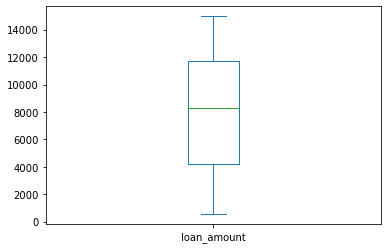

In [13]:
df['loan_amount'].plot(kind='box')
plt.show()

In [15]:
df['SQRT_RATE'] = df['rate']**0.5

In [16]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [17]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [18]:
print("Skewness {}".format(df.rate.skew()))
print('Skewness of the SQRT {}'.format(df.SQRT_RATE.skew()))
print('')
print("Kurtosis {}".format(df.rate.kurt()))
print("Kurtosis of the SQRT {}".format(df.SQRT_RATE.kurt()))

Skewness 0.884204614329943
Skewness of the SQRT 0.04964154055528862

Kurtosis 0.4243716514373652
Kurtosis of the SQRT -0.6318437642052039


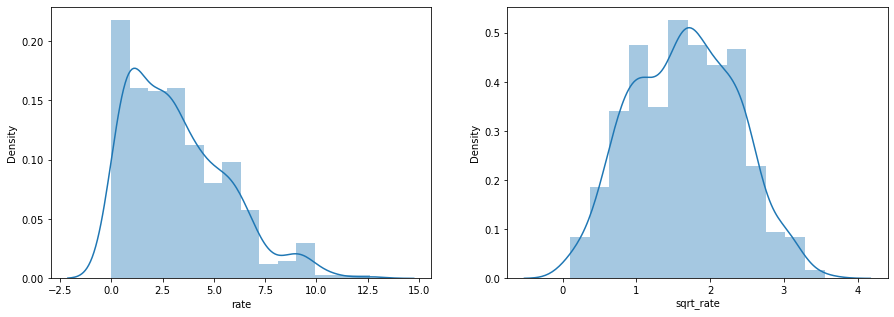

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])
plt.show()

In [20]:
df['Log Rate'] = np.log(df['rate'])

In [21]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [22]:
print("Skewness {}".format(df.rate.skew()))
print('Skewness of the SQRT {}'.format(df.SQRT_RATE.skew()))
print("Skewnss of the LOG transformed {}".format(df['Log Rate'].skew()))
print('')
print("Kurtosis {}".format(df.rate.kurt()))
print("Kurtosis of the SQRT {}".format(df.SQRT_RATE.kurt()))
print("Kurtosis of the LOG transformed {}".format(df['Log Rate'].kurt()))

Skewness 0.884204614329943
Skewness of the SQRT 0.04964154055528862
Skewnss of the LOG transformed -1.5943217626331552

Kurtosis 0.4243716514373652
Kurtosis of the SQRT -0.6318437642052039
Kurtosis of the LOG transformed 4.157026150198228


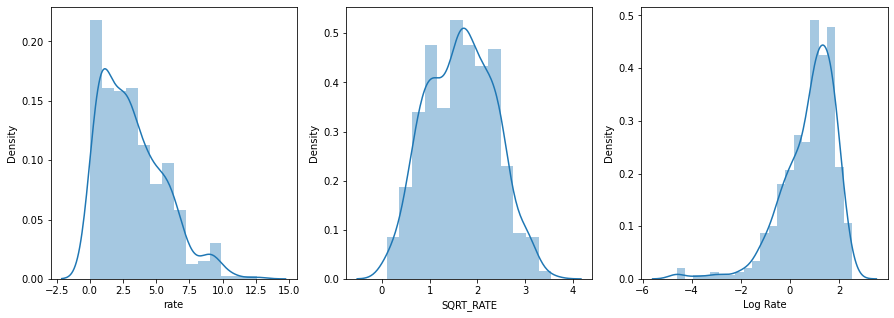

In [23]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])
plt.show()

In [24]:
df['LOG_Rate'] = df['rate'].apply(lambda x:np.log(x))

In [25]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033


In [26]:
df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [27]:
df1['loan_id'] = df1['loan_id'].astype('object')
df1['repaid'] = df1['repaid'].astype('category')

In [28]:
df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')
df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [29]:
import scipy.stats as stats

In [30]:
df1['ZR'] = stats.zscore(df1['rate'])

In [31]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [32]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [33]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [34]:
df2= df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [35]:
df1.shape

(443, 8)

In [36]:
df2.shape

(440, 9)

In [37]:
df3 = df2.copy()

In [38]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


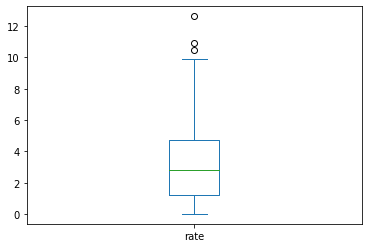

In [14]:
df['rate'].plot(kind='box')
plt.show()

In [39]:
Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
display(LC)
display(UC)

-3.9762499999999994

9.87375

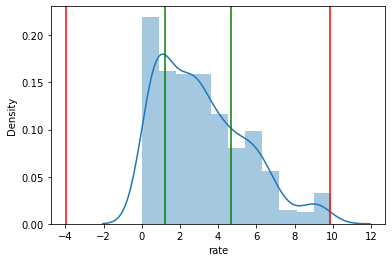

In [40]:
sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [41]:
df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [42]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

1

In [43]:
df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [44]:
df3.shape

(440, 8)

In [45]:
df4.shape

(439, 8)

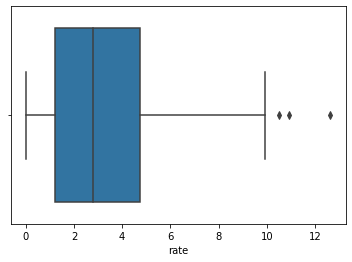

In [46]:
sns.boxplot(df1.rate)
plt.show()

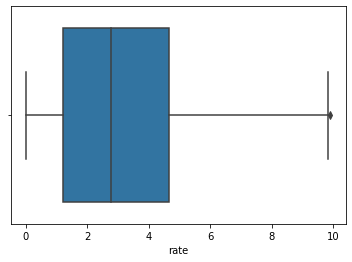

In [47]:
sns.boxplot(df2.rate)
plt.show()

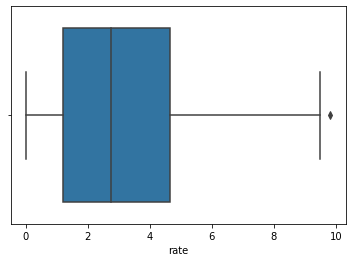

In [48]:
sns.boxplot(df4.rate)
plt.show()

In [49]:
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818183

In [50]:
std_rate = df3['rate'].std()
std_rate

2.307947418822915

In [51]:
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [52]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [53]:
print("Skewness {}.".format(df3.rate.skew()))
print("Kurtosis {}.".format(df3.rate.kurt()))
print('')
print("Skewness for the Zscore {}.".format(df3.Z_Score_Rate.skew()))
print("Kurtosis for the Zscore {}.".format(df3.Z_Score_Rate.kurt()))

Skewness 0.7594062707815686.
Kurtosis -0.05964248048746912.

Skewness for the Zscore 0.7594062707815689.
Kurtosis for the Zscore -0.05964248048746734.


In [54]:
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [55]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [56]:
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [57]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [58]:
print("Skewness {}.".format(df3.loan_amount.skew()))
print("Kurtosis {}.".format(df3.loan_amount.kurt()))
print('')
print("Skewness for the Zscore Scaled {}.".format(df3.Z_Score_LA.skew()))
print("Kurtosis for the Zscore Scaled {}.".format(df3.Z_Score_LA.kurt()))

Skewness -0.04678765472024289.
Kurtosis -1.2354309429278456.

Skewness for the Zscore Scaled -0.04678765472024289.
Kurtosis for the Zscore Scaled -1.2354309429278456.


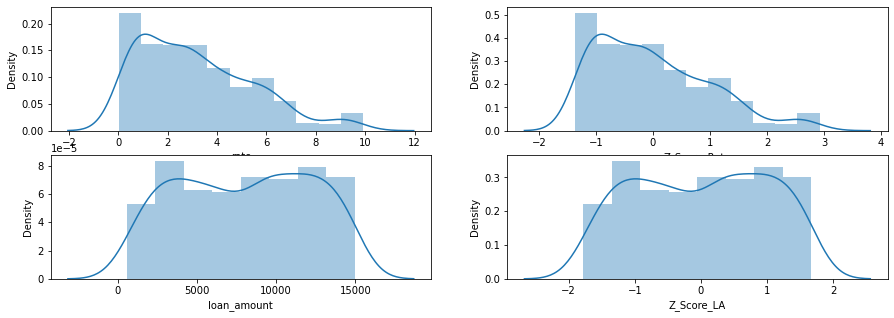

In [60]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])
plt.show()

In [ ]:
# MasoudKaviani.ir